<a href="https://colab.research.google.com/github/JossCastelazo/MiniProject2/blob/main/JC5943_ADS_HW2_DL_pytorch_COLLAB_LINK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#PyTorch Basics: Deep Learning & Data Analysis

**Over the next few weeks we will learn the basics of Deep Learning using pytorch**

Do the coding exercises below, add comments and markdown explanations, and upload the resulting notebook together with the collab corresponding to mini project 2.

This notebook covers:

1. Problem setup & data splits (train/val/test)  
2. PyTorch tensors, datasets, and dataloaders  
3. Models: linear regression, MLP for classification, CNN
4. Losses, regularization (L2/weight decay & dropout), and metrics  
5. Optimization: gradient descent w/ `torch.optim`   
6. Experiment tracking: random seeds, reproducibility, and plotting learning curves  

> This notebook uses only standard libraries available in Colab: `torch`, `numpy`, `matplotlib`, and the `sklearn` library for toy data.


In [1]:
#@title Imports & reproducibility helpers
import math, random, os, time
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from typing import Tuple, Dict, Any

try:
    from sklearn.datasets import make_moons, make_circles
    _HAS_SKLEARN = True
except Exception as e:
    print("scikit-learn not found; synthetic dataset generators will fall back to torch-only.")
    _HAS_SKLEARN = False

import matplotlib.pyplot as plt

def set_seed(seed: int = 123):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
set_seed(7)
DEVICE


'cuda'

#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩

##-1) Tensors

Tensors in pytorch are very similar to numpy arrays

1. 🧩 How do we construct a tensor?

Say we want to construct the following tensor using torch functions:

```python
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])
```

2. 🧩 What's the size of this tensor?


In [2]:
#@title Answer 1
my_tensor = torch.tensor([[0, 1, 2],
                          [3, 4, 5],
                          [6, 7, 8]])

print(my_tensor)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [3]:
#@title Answer 2
my_tensor.shape

torch.Size([3, 3])

In [4]:
#@title Pytorch has many useful functions for creating, indexing and operating with tensor
# Parameters
sequence = torch.arange(5)   # [0, 1, 2, 3, 4]
repeats = 3                  # number of times to repeat

# Construct the repeated tensor
x = sequence.repeat(repeats)

print(sequence), print(x)

tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])


(None, None)

In [5]:
#@title 🧩 Print a tensor of size (5,3), where all the values have one fixed size
torch.full((5,3), -2.0)

tensor([[-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.]])

###🧩 Construct* the following tensor:

```python
tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])

At some point in my code, I need to write an equation that uses 2 * pi.
I get an error allerting  me that my code returns a float where a tensor is expected. What is the type of

```python
type(2*torch.py)
```
and how do I turn into a tensor?


In [6]:
#@title 🧩 Use pytorch functions to generate this matrix

n = 4
A = torch.eye(n)                         # diagonal of 1s
A += torch.diag(torch.full((n-1,), -2.), diagonal=-1)  # sub-diagonal
A += torch.diag(torch.full((n-1,), -2.), diagonal=1)   # super-diagonal

print(A)

tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]])


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


# 0) Broadcasting, Indexing, and Distributions in PyTorch

**Goal:** Practice *broadcasting*, *masking*, and *distributions* in PyTorch through short guided exercises.

Run each code cell, fill in the `# TODO` parts, and test your answers.


In [7]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt
torch.manual_seed(0)



## Broadcasting and Fancy Indexing

Broadcasting and indexing make PyTorch efficient and expressive.



### 🧩 Exercise 0.1  
Construct a tensor `X` where `X[i,j] = 2*i + j` using broadcasting.  

**Example Output:**
```
tensor([[0, 1, 2, 3],
        [2, 3, 4, 5],
        [4, 5, 6, 7]])
```


In [8]:

# TODO: Construct X using broadcasting
i = torch.arange(3).view(-1, 1) # shape (3, 1): rows
j = torch.arange(4).view(1, -1) # shape (1, 4): columns
X = 2 * i + j

# Broadcasting: (3, 1) and (1, 4) → (3, 4)
print(X)


tensor([[0, 1, 2, 3],
        [2, 3, 4, 5],
        [4, 5, 6, 7]])


### 🧩 Exercise 0.2  
Compute a **distance matrix** `D` where `D[i,j]` is the Euclidean distance between `X[i]` and `X[j]`.  

Use broadcasting (no loops).


In [9]:

X = torch.arange(12, dtype=float).reshape(6, 2)
# TODO: Compute pairwise distances using broadcasting
# (6, 2) → (6, 1, 2) and (1, 6, 2), then broadcast to (6, 6, 2)
diff = X.unsqueeze(1) - X.unsqueeze(0)      # shape: (6, 6, 2)
D = torch.sqrt((diff ** 2).sum(dim=-1))     # shape: (6, 6)

print(D)


tensor([[ 0.0000,  2.8284,  5.6569,  8.4853, 11.3137, 14.1421],
        [ 2.8284,  0.0000,  2.8284,  5.6569,  8.4853, 11.3137],
        [ 5.6569,  2.8284,  0.0000,  2.8284,  5.6569,  8.4853],
        [ 8.4853,  5.6569,  2.8284,  0.0000,  2.8284,  5.6569],
        [11.3137,  8.4853,  5.6569,  2.8284,  0.0000,  2.8284],
        [14.1421, 11.3137,  8.4853,  5.6569,  2.8284,  0.0000]],
       dtype=torch.float64)



### 🧩 Exercise 0.3  
Extract the submatrix of rows `[1,4]` and columns `[0,2,3]` of  
`A = torch.arange(36).reshape(6, 6)`

**Expected Output:**
```
tensor([[ 6,  8,  9],
        [24, 26, 27]])
```


In [10]:

A = torch.arange(36).reshape(6, 6)
# TODO: Extract submatrix using indexing
rows = torch.tensor([1, 4])
cols = torch.tensor([0, 2, 3])

subA = A[rows][:, cols]
print(subA)


tensor([[ 6,  8,  9],
        [24, 26, 27]])



### 🧩 Exercise 0.4  
Create a **boolean mask** `M` where `M[i,j]` is True iff `A[i,j]` is divisible by 5 or 7.


In [11]:

A = torch.arange(36).reshape(6, 6)
# TODO: Create boolean mask
M = (A % 5 == 0) | (A % 7 == 0)
print(M.sum())


tensor(12)



### 🧩 Exercise 0.5  
Using the mask `M`, add 10 to elements of `A` that are divisible by 5 or 7 (in-place).


In [12]:

# TODO: Update A in-place
A[M] += 10
print(A)


tensor([[10,  1,  2,  3,  4, 15],
        [ 6, 17,  8,  9, 20, 11],
        [12, 13, 24, 25, 16, 17],
        [18, 19, 30, 31, 22, 23],
        [24, 35, 26, 27, 38, 29],
        [40, 31, 32, 33, 34, 45]])



## Distributions

`torch.distributions` provides a clean API for probability distributions and supports broadcasting.



### 🧩 Exercise 0.6  
Draw **100 samples** from a Poisson distribution with rate λ = 4.5.


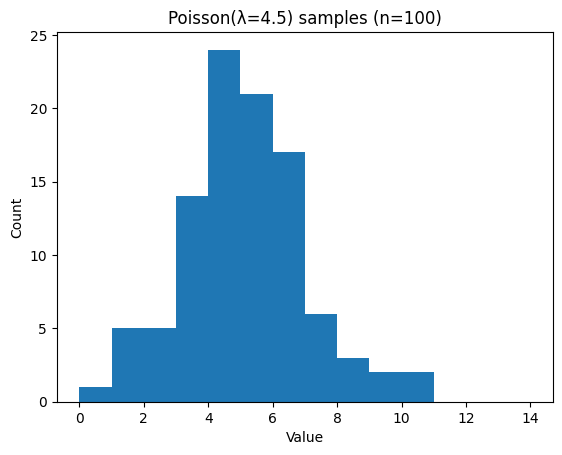

In [13]:

# TODO: Draw samples and plot histogram
samples = dist.Poisson(4.5).sample((100,))
plt.hist(samples.numpy(), bins=range(0, 15))
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Poisson(λ=4.5) samples (n=100)")
plt.show()



### 🧩 🧩 Exercise 0.7  
Construct a matrix `P` where  
`P[i,j] = exp(-λ[i]) * λ[i]^j / j!`  
for λ = `torch.arange(1.,6.)` and j = `torch.arange(5.)`.


In [14]:

lam = torch.arange(1.,6.).view(-1,1)
j = torch.arange(5.).view(1,-1)
# TODO: Compute P using broadcasting and torch.lgamma
factorial = torch.exp(torch.lgamma(j + 1))           # j! via gamma function
P = torch.exp(-lam) * (lam ** j) / factorial        # Poisson pmf: e^{-λ} λ^j / j!

print(P)


tensor([[0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954],
        [0.0067, 0.0337, 0.0842, 0.1404, 0.1755]])



### 🧩 🧩 Exercise 0.8
Evaluate the **log-probability** of `[0.5, 2.0, 5.0]`  
under a Gamma distribution with shape=3.0, rate=2.0.


In [15]:

# TODO: Evaluate log probability
g = dist.Gamma(concentration=torch.tensor(3.0), rate=torch.tensor(2.0))
logp = g.log_prob(torch.tensor([0.5, 2.0, 5.0]))
print(logp)


tensor([-1.0000, -1.2274, -5.3948])



### 🧩 Problem 0.9  
Draw **1000 samples** from a mixture of two Poisson distributions  
with rates 2 and 7, equal weights (0.5, 0.5).  
Plot a normalized histogram.


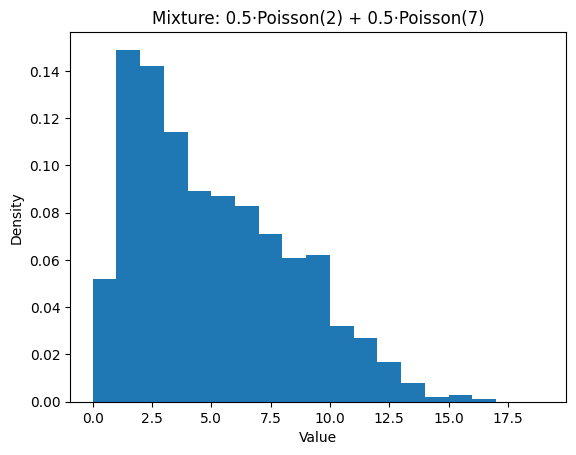

In [16]:

# TODO: Draw samples from mixture
z = torch.bernoulli(torch.full((1000,), 0.5))                     # mixture component indicators
lam = torch.where(z.bool(), torch.tensor(7.), torch.tensor(2.))   # rate = 7 if z=1, else 2
samples = dist.Poisson(lam).sample()                              # one sample per λ

plt.hist(samples.numpy(), bins=range(0, 20), density=True)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Mixture: 0.5·Poisson(2) + 0.5·Poisson(7)")
plt.show()



## Normal Distributions



### 🧩 Problem 0.10  
Use `dist.Normal` to draw a batch of shape `(200, 3)` of independent standard normal random variables.


In [17]:

# TODO: Draw standard normal samples
normals = dist.Normal(0, 1).sample((200, 3))
print(normals.shape)

torch.Size([200, 3])



### 🧩 Problem 0.11  
Use `dist.Normal` to draw a batch of shape `(4, 4)`  
with means given by `mu` and variance 1.0.


In [18]:

mu = torch.tensor([[ 0,  1,  2,  3],
                   [ 4,  5,  6,  7],
                   [ 8,  9, 10, 11],
                   [12, 13, 14, 15]], dtype=torch.float32)
# TODO: Draw samples
samples = dist.Normal(mu, 1.0).sample()
print(samples.shape)


torch.Size([4, 4])



---
### ✅ Notes / Extensions

- Vary λ and j shapes to visualize broadcasting.  
- Plot distance matrices `plt.imshow(D)` to see patterns.  
- Compare the Poisson mixture histogram with theoretical PMFs.  
- Explore `dist.MixtureSameFamily` for more complex mixtures.


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


# 1) Data: from arrays to `Dataset`/`DataLoader` + train/val/test split

**Key ideas**
- Always separate data into **train / validation / test** (e.g., 70/15/15).  
- Wrap arrays in a custom `Dataset` to keep the training loop clean.  
- Use a `DataLoader` for batching, shuffling, and parallel loading.

We'll start with toy 2D datasets for classification (moons and circles) and a simple 1D regression problem.


In [19]:

#@title Toy datasets (classification: moons/circles) + (regression: y = ax + b + noise)
def make_toy_classification(n_samples=1000, kind="moons", noise=0.2, seed=0):
    set_seed(seed)
    if _HAS_SKLEARN:
        if kind == "moons":
            X, y = make_moons(n_samples=n_samples, noise=noise)
        elif kind == "circles":
            X, y = make_circles(n_samples=n_samples, factor=0.4, noise=noise)
        else:
            raise ValueError("kind must be 'moons' or 'circles'")
        X = X.astype(np.float32); y = y.astype(np.int64)
    else:
        # Torch-only fallback: two Gaussian blobs
        c1 = torch.randn(n_samples//2, 2) * (1+noise) + torch.tensor([0.0, 0.0])
        c2 = torch.randn(n_samples//2, 2) * (1+noise) + torch.tensor([2.5, 2.5])
        X = torch.cat([c1, c2], dim=0).numpy().astype(np.float32)
        y = torch.cat([torch.zeros(len(c1)), torch.ones(len(c2))]).numpy().astype(np.int64)
    return X, y

def make_toy_regression(n_samples=600, a=2.0, b=-1.0, noise_std=0.3, seed=0):
    set_seed(seed)
    x = np.random.uniform(-2.0, 2.0, size=(n_samples, 1)).astype(np.float32)
    y = (a * x + b + np.random.normal(0, noise_std, size=x.shape)).astype(np.float32)
    return x, y

class NumpyDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

def train_val_test_split(ds: Dataset, ratios=(0.7, 0.15, 0.15), seed=42):
    assert abs(sum(ratios) - 1.0) < 1e-6, "Ratios must sum to 1"
    n = len(ds)
    n_train = int(ratios[0] * n)
    n_val = int(ratios[1] * n)
    n_test = n - n_train - n_val
    set_seed(seed)
    return random_split(ds, [n_train, n_val, n_test])


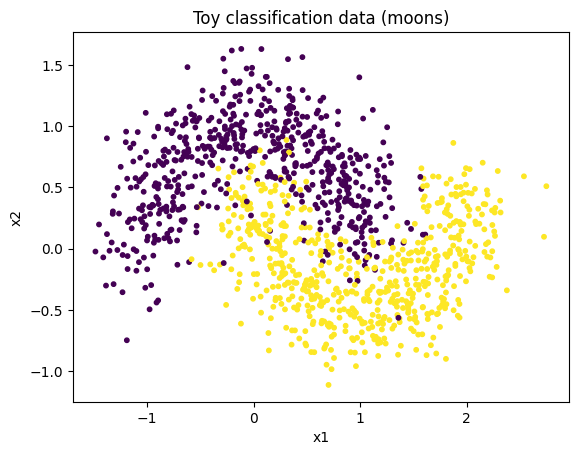

(840, 180, 180)

In [20]:

#@title Visualize a toy classification dataset
Xc, yc = make_toy_classification(n_samples=1200, kind="moons", noise=0.25, seed=1)
ds_cls = NumpyDataset(Xc, yc)
train_ds, val_ds, test_ds = train_val_test_split(ds_cls, (0.7, 0.15, 0.15), seed=1)

plt.figure()
plt.scatter(Xc[:,0], Xc[:,1], c=yc, s=10)
plt.title("Toy classification data (moons)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

len(train_ds), len(val_ds), len(test_ds)


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩

## 2) Linear Regression in PyTorch (MSE loss)

We'll fit a line to noisy data: \( y \approx ax + b \).  
This section introduces:
- `nn.Module` for models
- Mean Squared Error (MSE) loss
- `optim.SGD` and `optim.Adam`


In [21]:
#@title Linear regression dataset & model
Xr, yr = make_toy_regression(n_samples=600, a=2.2, b=-0.7, noise_std=0.35, seed=2)
ds_reg = NumpyDataset(Xr, yr)

train_r, val_r, test_r = train_val_test_split(ds_reg, (0.7, 0.15, 0.15), seed=2)
train_loader_r = DataLoader(train_r, batch_size=64, shuffle=True)
val_loader_r   = DataLoader(val_r, batch_size=128, shuffle=False)
test_loader_r  = DataLoader(test_r, batch_size=128, shuffle=False)

class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)

model = LinearRegressor().to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=0.0)  # weight_decay = L2


In [22]:
#@title Training & evaluation utilities
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)

@torch.no_grad()
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        preds = model(xb)
        loss = criterion(preds, yb)
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)


Epoch 050 | train: 0.1175 | val: 0.0840
Epoch 100 | train: 0.1170 | val: 0.0847
Epoch 150 | train: 0.1170 | val: 0.0847
Epoch 200 | train: 0.1170 | val: 0.0848


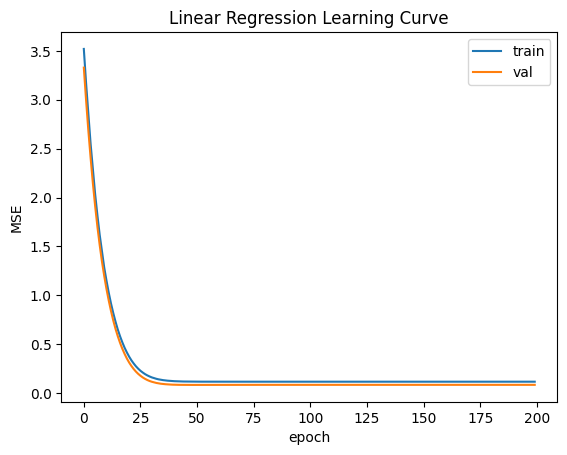

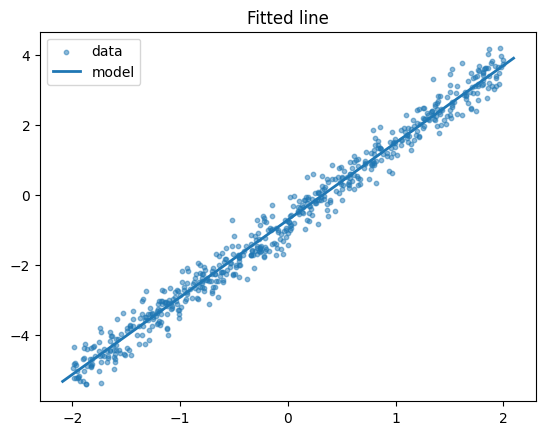

In [23]:

#@title Fit linear model & plot learning curve
train_hist, val_hist = [], []
epochs = 200
best_val = float("inf")
best_state = None

for epoch in range(1, epochs+1):
    tr = train_epoch(model, train_loader_r, criterion, optimizer)
    va = evaluate(model, val_loader_r, criterion)
    train_hist.append(tr); val_hist.append(va)
    if va < best_val:
        best_val = va; best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | train: {tr:.4f} | val: {va:.4f}")

# restore best
model.load_state_dict(best_state)

plt.figure()
plt.plot(train_hist, label="train")
plt.plot(val_hist, label="val")
plt.xlabel("epoch"); plt.ylabel("MSE")
plt.title("Linear Regression Learning Curve")
plt.legend(); plt.show()

# Visualize fit
@torch.no_grad()
def predict(x):
    return model(torch.from_numpy(x).to(DEVICE)).cpu().numpy()

xs = np.linspace(Xr.min()-0.1, Xr.max()+0.1, 200).reshape(-1,1).astype(np.float32)
ys = predict(xs)

plt.figure()
plt.scatter(Xr, yr, s=10, alpha=0.5, label="data")
plt.plot(xs, ys, linewidth=2, label="model")
plt.legend(); plt.title("Fitted line"); plt.show()


# Exercise A
Create a synthetic data where the regressor x is an (n,2) dimensional tensor
and the target y is a (n,4) dimensional tensor. Does the LinearRegressor model
``` python
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)
```
work? Why or why not? How can you modify the class to make it work? Once you fit the model, visualize the result.

[Multi] Epoch 050 | train: 0.0099 | val: 0.0100
[Multi] Epoch 100 | train: 0.0099 | val: 0.0100
[Multi] Epoch 150 | train: 0.0099 | val: 0.0101
[Multi] Epoch 200 | train: 0.0099 | val: 0.0100


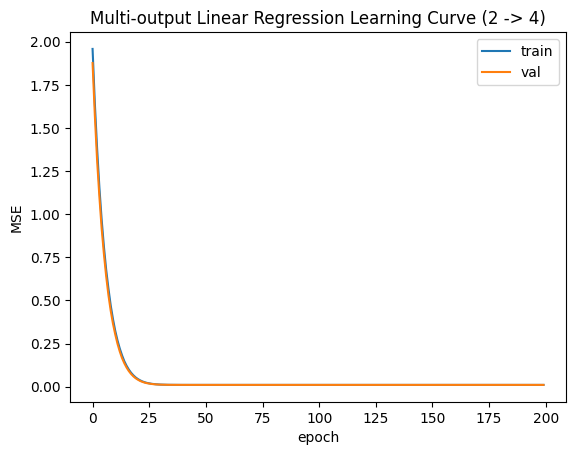

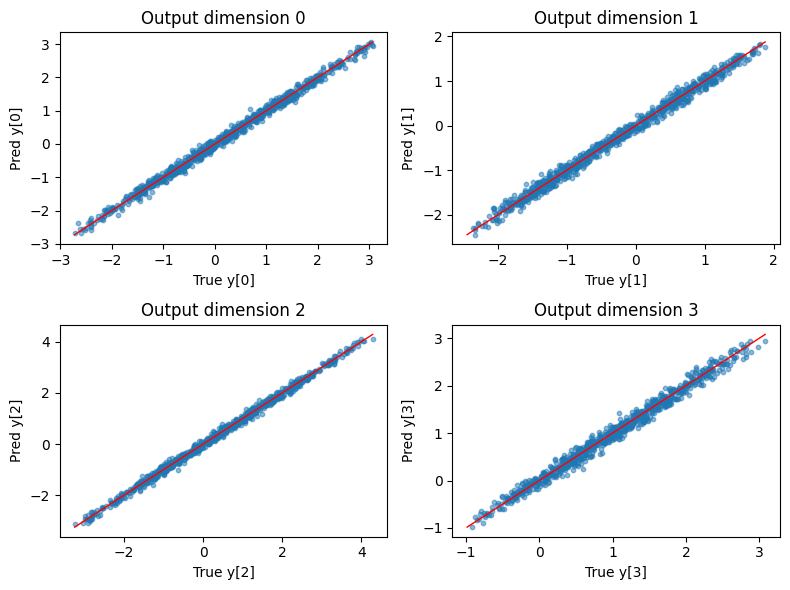

In [24]:
# Exercise A: 2D input (x) and 4D output (y) linear regression

# 1) Create synthetic data: x in R^2, y in R^4
set_seed(0)
n = 800

# x: uniform in [-2, 2]^2
X2 = np.random.uniform(-2.0, 2.0, size=(n, 2)).astype(np.float32)

# Ground-truth linear mapping: y = X2 @ W^T + b + noise
W_true = np.array([[ 1.0, -0.5],
                   [ 0.3,  0.8],
                   [-1.2,  0.7],
                   [ 0.5,  0.5]], dtype=np.float32)   # shape (4, 2)
b_true = np.array([0.2, -0.3, 0.5, 1.0], dtype=np.float32)        # shape (4,)

Y4 = X2 @ W_true.T + b_true + 0.1 * np.random.randn(n, 4).astype(np.float32)

# Wrap into NumpyDataset and train/val/test split
ds_multi = NumpyDataset(X2, Y4)
train_m, val_m, test_m = train_val_test_split(ds_multi, (0.7, 0.15, 0.15), seed=3)

train_loader_m = DataLoader(train_m, batch_size=64, shuffle=True)
val_loader_m   = DataLoader(val_m, batch_size=128, shuffle=False)
test_loader_m  = DataLoader(test_m, batch_size=128, shuffle=False)


# 2) Modified linear regressor: maps R^2 -> R^4
class LinearRegressorMulti(nn.Module):
    def __init__(self):
        super().__init__()
        # The key change: in_features=2, out_features=4
        self.linear = nn.Linear(2, 4)

    def forward(self, x):
        return self.linear(x)

model_m = LinearRegressorMulti().to(DEVICE)
criterion_m = nn.MSELoss()
optimizer_m = torch.optim.Adam(model_m.parameters(), lr=1e-2, weight_decay=0.0)


# 3) Train the model using the same utilities as before
epochs = 200
train_hist_m, val_hist_m = [], []
best_val_m = float("inf")
best_state_m = None

for epoch in range(1, epochs + 1):
    tr = train_epoch(model_m, train_loader_m, criterion_m, optimizer_m)
    va = evaluate(model_m, val_loader_m, criterion_m)
    train_hist_m.append(tr); val_hist_m.append(va)

    if va < best_val_m:
        best_val_m = va
        best_state_m = {k: v.cpu().clone() for k, v in model_m.state_dict().items()}

    if epoch % 50 == 0:
        print(f"[Multi] Epoch {epoch:03d} | train: {tr:.4f} | val: {va:.4f}")

# Restore best model
model_m.load_state_dict(best_state_m)


# 4) Visualize learning curve
plt.figure()
plt.plot(train_hist_m, label="train")
plt.plot(val_hist_m, label="val")
plt.xlabel("epoch"); plt.ylabel("MSE")
plt.title("Multi-output Linear Regression Learning Curve (2 -> 4)")
plt.legend(); plt.show()


# 5) Visualize predictions vs true targets for each output dim
@torch.no_grad()
def predict_multi(x_np):
    return model_m(torch.from_numpy(x_np).to(DEVICE)).cpu().numpy()

Y_pred = predict_multi(X2)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.ravel()

for k in range(4):
    ax = axes[k]
    ax.scatter(Y4[:, k], Y_pred[:, k], s=10, alpha=0.5)
    # reference line y = x
    y_min = min(Y4[:, k].min(), Y_pred[:, k].min())
    y_max = max(Y4[:, k].max(), Y_pred[:, k].max())
    ax.plot([y_min, y_max], [y_min, y_max], "r", linewidth=1)
    ax.set_xlabel(f"True y[{k}]")
    ax.set_ylabel(f"Pred y[{k}]")
    ax.set_title(f"Output dimension {k}")

plt.tight_layout()
plt.show()


### Exercise A

In this exercise I extend the linear regression setup to a case where:
- The input regressor `x` has shape `(n, 2)`.
- The target `y` has shape `(n, 4)`.

The original `LinearRegressor` uses `nn.Linear(1, 1)`, so it only supports 1D inputs and 1D outputs. It fails here becuase:
- The input dimension (2) does not match `in_features=1`.
- The target dimension (4) does not match the model output dimension (1).

To fix this, I define a new model with `nn.Linear(2, 4)`, which learns a linear map from R² to R⁴.

After thgat:
1. Generate synthetic data with a known linear mapping `y = XWᵀ + b + noise`.
2. Train the new model on this (using MSE and Adam).
3. Plot the learning curves (train/val MSE).
4. Visualize the fit by plotting true vs. predicted values for each of the 4 output dimensions.


#Exercise B
The function train_val_test_split does the job, but it does not seem very elegant. Using  
``` python
    from torch.utils.data import random_split
```    
create a 60-20-20 split of your data and train a model using that.

[60-20-20] Epoch 050 | train: 0.1552 | val: 0.1525
[60-20-20] Epoch 100 | train: 0.1178 | val: 0.1243
[60-20-20] Epoch 150 | train: 0.1178 | val: 0.1240
[60-20-20] Epoch 200 | train: 0.1180 | val: 0.1237
[60-20-20] Test MSE: 0.1007


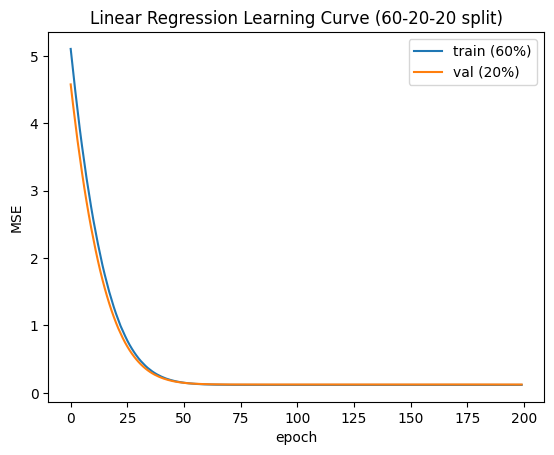

In [25]:
from torch.utils.data import random_split

full_ds = ds_reg   # (Xr, yr) wrapped in NumpyDataset

# 1) 60-20-20 split w/ random_split
total_len = len(full_ds)
n_train = int(0.6 * total_len)
n_val   = int(0.2 * total_len)
n_test  = total_len - n_train - n_val

train_ds_60, val_ds_20, test_ds_20 = random_split(
    full_ds,
    [n_train, n_val, n_test],
    generator=torch.Generator().manual_seed(42)  # reproducible split
)

# 2) DataLoaders for  new splits
train_loader_60 = DataLoader(train_ds_60, batch_size=64, shuffle=True)
val_loader_20   = DataLoader(val_ds_20, batch_size=128, shuffle=False)
test_loader_20  = DataLoader(test_ds_20, batch_size=128, shuffle=False)

# 3) Fresh model + optimizer + loss
model_60 = LinearRegressor().to(DEVICE)
criterion_60 = nn.MSELoss()
optimizer_60 = torch.optim.Adam(model_60.parameters(), lr=1e-2, weight_decay=0.0)

# 4) Train w/ the same utilities
epochs = 200
train_hist_60, val_hist_60 = [], []
best_val_60 = float("inf")
best_state_60 = None

for epoch in range(1, epochs + 1):
    tr = train_epoch(model_60, train_loader_60, criterion_60, optimizer_60)
    va = evaluate(model_60, val_loader_20, criterion_60)
    train_hist_60.append(tr); val_hist_60.append(va)

    if va < best_val_60:
        best_val_60 = va
        best_state_60 = {k: v.cpu().clone() for k, v in model_60.state_dict().items()}

    if epoch % 50 == 0:
        print(f"[60-20-20] Epoch {epoch:03d} | train: {tr:.4f} | val: {va:.4f}")

model_60.load_state_dict(best_state_60)

test_loss_60 = evaluate(model_60, test_loader_20, criterion_60)
print(f"[60-20-20] Test MSE: {test_loss_60:.4f}")

plt.figure()
plt.plot(train_hist_60, label="train (60%)")
plt.plot(val_hist_60, label="val (20%)")
plt.xlabel("epoch"); plt.ylabel("MSE")
plt.title("Linear Regression Learning Curve (60-20-20 split)")
plt.legend(); plt.show()

Here I recreate the dataset split using random_split directly (60–20–20), then reusse the same linear regression model and training loop as before, and finally check the learning curves and test MSE under this new split.

## Exercise C
### Write your own Mean Squared Error

PyTorch provides a built-in criterion:

```python
criterion = nn.MSELoss()

But it’s important to understand what happens under the hood.
Let’s implement our own version — call it nn.MeanSquaredOops — that behaves like nn.MSELoss. It should work as a callable class:

```python
criterion = MeanSquaredOops()
loss = criterion(y_pred, y_true)


```python
# YOUR WORK: Implement MeanSquaredOops to mimic nn.MSELoss

import torch
import torch.nn as nn

class MeanSquaredOops(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, y_pred, y_true):
        # compute the mean of squared differences
        raise NotImplementedError("Implement the MSE formula here!")

# Test it
criterion = nn.MSELoss()
oops = MeanSquaredOops()

y_pred = torch.tensor([2.5, 0.0, 2.1])
y_true = torch.tensor([3.0, -0.5, 2.0])

print("PyTorch MSELoss:", criterion(y_pred, y_true).item())
print("Your MeanSquaredOops:", oops(y_pred, y_true).item())

```

Write a function to visualize the loss function curves on: training, testing and evaluation datasets. How do they look like?

In [26]:
import torch
import torch.nn as nn

class MeanSquaredOops(nn.Module):
    def __init__(self, reduction: str = "mean"):
        super().__init__()
        self.reduction = reduction

    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        se = diff ** 2  # squared error

        if self.reduction == "mean":
            return se.mean()
        elif self.reduction == "sum":
            return se.sum()
        else:
            return se

# TestEr
criterion = nn.MSELoss()
oops = MeanSquaredOops()

y_pred = torch.tensor([2.5, 0.0, 2.1])
y_true = torch.tensor([3.0, -0.5, 2.0])

print("PyTorch MSELoss:", criterion(y_pred, y_true).item())
print("Your MeanSquaredOops:", oops(y_pred, y_true).item())


PyTorch MSELoss: 0.17000000178813934
Your MeanSquaredOops: 0.17000000178813934


[Oops] Epoch 050 | train: 0.1335 | val: 0.0940 | test: 0.1427
[Oops] Epoch 100 | train: 0.1169 | val: 0.0848 | test: 0.1417
[Oops] Epoch 150 | train: 0.1169 | val: 0.0848 | test: 0.1418
[Oops] Epoch 200 | train: 0.1169 | val: 0.0848 | test: 0.1412


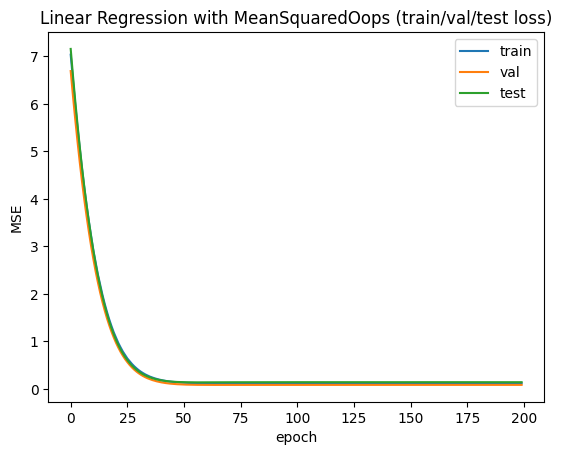

In [27]:
model_oops = LinearRegressor().to(DEVICE)
criterion_oops = MeanSquaredOops()
optimizer_oops = torch.optim.Adam(model_oops.parameters(), lr=1e-2, weight_decay=0.0)

epochs = 200
train_hist_oops, val_hist_oops, test_hist_oops = [], [], []
best_val_oops = float("inf")
best_state_oops = None

for epoch in range(1, epochs + 1):
    tr = train_epoch(model_oops, train_loader_r, criterion_oops, optimizer_oops)
    va = evaluate(model_oops, val_loader_r, criterion_oops)
    te = evaluate(model_oops, test_loader_r, criterion_oops)

    train_hist_oops.append(tr)
    val_hist_oops.append(va)
    test_hist_oops.append(te)

    if va < best_val_oops:
        best_val_oops = va
        best_state_oops = {k: v.cpu().clone() for k, v in model_oops.state_dict().items()}

    if epoch % 50 == 0:
        print(f"[Oops] Epoch {epoch:03d} | train: {tr:.4f} | val: {va:.4f} | test: {te:.4f}")

# restore best model (by val)
model_oops.load_state_dict(best_state_oops)


# helper: visualize loss curves for train / val / test
def plot_loss_curves(train_hist, val_hist, test_hist, title="Loss curves"):
    plt.figure()
    plt.plot(train_hist, label="train")
    plt.plot(val_hist, label="val")
    plt.plot(test_hist, label="test")
    plt.xlabel("epoch")
    plt.ylabel("MSE")
    plt.title(title)
    plt.legend()
    plt.show()

plot_loss_curves(train_hist_oops, val_hist_oops, test_hist_oops,
                 title="Linear Regression with MeanSquaredOops (train/val/test loss)")


The training loss decreases smoothly over epochs, while the validation and test losses follow a similar trend and flatten near the same level, which suggests that the model is fitting the data well without severe overfitting.

#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


## 3) Classification with an MLP (Cross-Entropy loss)

- Two-layer MLP with ReLU and Dropout  
- Cross-entropy loss for a 2-class problem  
- Accuracy metric  
- Optional L2 (weight decay) for regularization  
- Optional learning-rate scheduler


In [28]:

#@title Dataloaders for classification
batch_size = 64
train_loader_c = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader_c   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader_c  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)


In [29]:

#@title MLP model, loss, optimizer, scheduler
class MLP(nn.Module):
    def __init__(self, in_dim=2, hidden=64, p_dropout=0.2, n_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Dropout(p_dropout),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, n_classes)
        )
    def forward(self, x):
        return self.net(x)

mlp = MLP().to(DEVICE)
ce = nn.CrossEntropyLoss()
opt = torch.optim.Adam(mlp.parameters(), lr=5e-3, weight_decay=1e-4)  # weight_decay = L2 regularization
sched = torch.optim.lr_scheduler.StepLR(opt, step_size=100, gamma=0.5)


## Exercise D
Write using markdown + LaTex what the MLP above is implementing. Explain what ReLU, Dropout, Linear are. Write down what the dimension of an object x.forward is before the nn.Dropout(p_dropout) operation.


### What the MLP is doing

The MLP defined above is small feed-forward neural network with the form  
\[
f(x) = W_3\,\sigma\Big(W_2\,D\big(\sigma(W_1 x + b_1)\big) + b_2\Big) + b_3,
\]
where:
- \(x \in \mathbb{R}^{B \times 2}\) is a batch of 2D inputs (here \(B\) = batch size),
- \(W_1 \in \mathbb{R}^{64 \times 2},\; b_1 \in \mathbb{R}^{64}\),
- \(W_2 \in \mathbb{R}^{64 \times 64},\; b_2 \in \mathbb{R}^{64}\),
- \(W_3 \in \mathbb{R}^{2 \times 64},\; b_3 \in \mathbb{R}^{2}\),
- \(\sigma(\cdot)\) is the ReLU nonlinearity,
- \(D(\cdot)\) is the dropout operation with probability \(p_{\text{dropout}}\).

The output \(f(x)\) is a tensor of shape \((B, 2)\) containing the logits for the two classes.

---

### What each layer does

- **`nn.Linear`**  
  Applies an affine transformation:
  \[
  z = W x + b.
  \]
  It mixes and rescales features using learnable weights \(W\) and bias \(b\). In our case:
  - First `Linear(2, 64)` maps each 2D input to a 64-dimensional hidden representation.
  - Second `Linear(64, 64)` keeps us in a 64-dimensional hidden space.
  - Final `Linear(64, 2)` maps the hidden representation to 2 logits (one per class).

- **`nn.ReLU`**  
  Applies the Rectified Linear Unit elementwise:
  \[
  \text{ReLU}(z) = \max(0, z).
  \]
  It keeps positive activations and sets negative ones to zero, which introduces non-linearity and helps the network learn more complex decision boundaries.

- **`nn.Dropout(p_dropout)`**  
  During training, randomly sets each hidden unit to zero with probability \(p_{\text{dropout}}\). This acts as a regularizer by preventing the network from relying too heavily on any single hidden neuron. At test time, dropout is turned off (no units are dropped).

---

### Dimension before `nn.Dropout(p_dropout)`

Let the input batch have shape \((B, 2)\). After the first linear layer and ReLU:

1. `nn.Linear(2, 64)` → shape becomes \((B, 64)\).
2. `nn.ReLU()` keeps the same shape.

So **right before** `nn.Dropout(p_dropout)`, the tensor has shape:
\[
(B, 64),
\]
i.e. a batch of 64-dimensional hidden representations.
\\

In [30]:

#@title Train loop with accuracy
def accuracy_from_logits(logits, y):
    preds = logits.argmax(dim=1)
    return (preds == y).float().mean().item()

def train_epoch_cls(model, loader, criterion, optimizer):
    model.train()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward(); optimizer.step()
        total_loss += loss.item() * xb.size(0)
        total_acc  += accuracy_from_logits(logits, yb) * xb.size(0)
        n += xb.size(0)
    return total_loss/n, total_acc/n

@torch.no_grad()
def evaluate_cls(model, loader, criterion):
    model.eval()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        logits = model(xb)
        loss = criterion(logits, yb)
        total_loss += loss.item() * xb.size(0)
        total_acc  += accuracy_from_logits(logits, yb) * xb.size(0)
        n += xb.size(0)
    return total_loss/n, total_acc/n


## Exercise E
Write the code above in as few lines of code as possible. What torch functions can you use?

You can squeeze this a lot by (i) reusing a single helper for train/eval and (ii) relying on argmax, eq, float, mean, and torch.set_grad_enabled.

In [31]:
def accuracy_from_logits(logits, y):
    return (logits.argmax(1).eq(y).float().mean().item())

def epoch_cls(model, loader, criterion, optimizer=None):
    train = optimizer is not None
    model.train() if train else model.eval()
    loss_sum = acc_sum = n = 0
    with torch.set_grad_enabled(train):
        for xb, yb in loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            if train: optimizer.zero_grad()
            logits = model(xb)
            loss = criterion(logits, yb)
            if train: loss.backward(); optimizer.step()
            bs = xb.size(0)
            loss_sum += loss.item() * bs
            acc_sum  += (logits.argmax(1).eq(yb).float().sum().item())
            n += bs
    return loss_sum / n, acc_sum / n

Epoch 050  loss: 0.154/0.117  acc: 0.942/0.950
Epoch 100  loss: 0.138/0.112  acc: 0.949/0.939
Epoch 150  loss: 0.130/0.111  acc: 0.954/0.939
Epoch 200  loss: 0.135/0.124  acc: 0.945/0.944
Epoch 250  loss: 0.126/0.111  acc: 0.949/0.939
Epoch 300  loss: 0.124/0.112  acc: 0.954/0.939


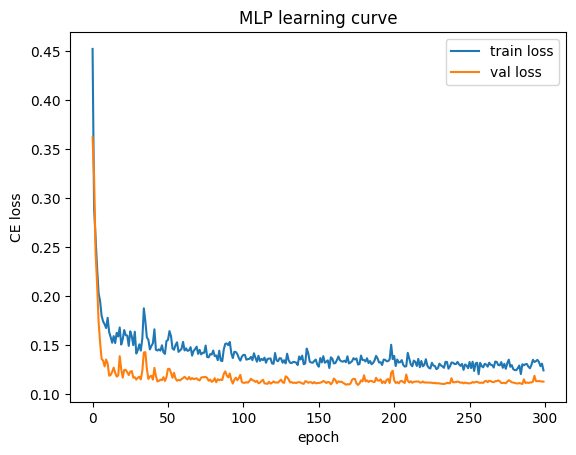

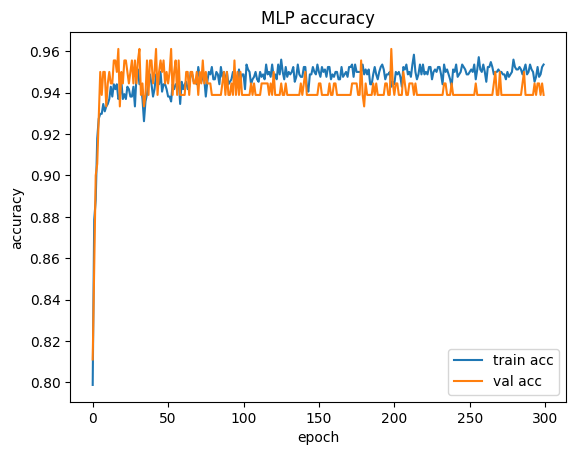

In [32]:

#@title Fit MLP
best_val = 1e9; best_state = None
hist = {"tr_loss":[], "tr_acc":[], "va_loss":[], "va_acc":[]}
epochs = 300

for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(mlp, train_loader_c, ce, opt)
    va_loss, va_acc = evaluate_cls(mlp, val_loader_c, ce)
    hist["tr_loss"].append(tr_loss); hist["tr_acc"].append(tr_acc)
    hist["va_loss"].append(va_loss); hist["va_acc"].append(va_acc)
    sched.step()
    if va_loss < best_val:
        best_val = va_loss
        best_state = {k: v.cpu().clone() for k, v in mlp.state_dict().items()}
    if ep % 50 == 0:
        print(f"Epoch {ep:03d}  loss: {tr_loss:.3f}/{va_loss:.3f}  acc: {tr_acc:.3f}/{va_acc:.3f}")

mlp.load_state_dict(best_state)

plt.figure()
plt.plot(hist["tr_loss"], label="train loss")
plt.plot(hist["va_loss"], label="val loss")
plt.xlabel("epoch"); plt.ylabel("CE loss"); plt.legend(); plt.title("MLP learning curve"); plt.show()

plt.figure()
plt.plot(hist["tr_acc"], label="train acc")
plt.plot(hist["va_acc"], label="val acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("MLP accuracy"); plt.show()


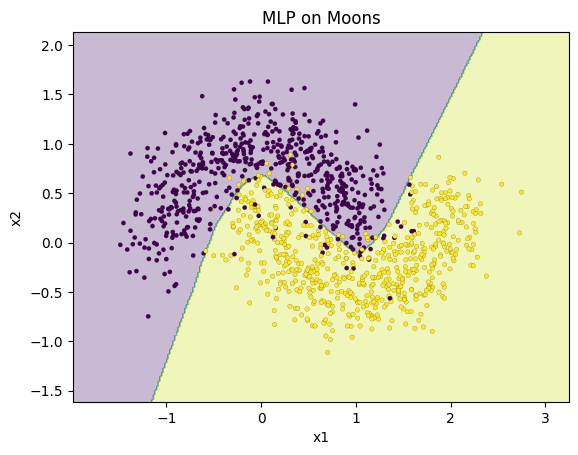

In [33]:

#@title Decision boundary visualization
@torch.no_grad()
def plot_decision_boundary(model, X, y, title="Decision boundary"):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.stack([xx.ravel(), yy.ravel()], axis=1).astype(np.float32)
    logits = model(torch.from_numpy(grid).to(DEVICE)).cpu().numpy()
    Z = logits.argmax(axis=1).reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=10, edgecolor="k", linewidth=0.1)
    plt.title(title); plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()

Xc_np, yc_np = Xc, yc
plot_decision_boundary(mlp, Xc_np, yc_np, title="MLP on Moons")


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


## 4) (Optional) Tiny CNN on synthetic images

We'll create small 16×16 grayscale images containing either a **dot** or a **ring** and train a mini-CNN.
This mirrors the idea of "coloring pixels" or simple shape detection and is fast to run on CPU.


In [34]:

#@title Synthetic image dataset (dot vs ring)
def make_dot(center, size=16):
    img = np.zeros((size, size), dtype=np.float32)
    img[center] = 1.0
    return img

def make_ring(center, radius=3, size=16):
    img = np.zeros((size, size), dtype=np.float32)
    cx, cy = center
    for x in range(size):
        for y in range(size):
            if abs(math.hypot(x-cx, y-cy) - radius) < 0.6:
                img[x, y] = 1.0
    return img

def make_image_dataset(n=2000, size=16, seed=0):
    set_seed(seed)
    X, y = [], []
    for i in range(n):
        cls = np.random.randint(0,2)  # 0=dot, 1=ring
        cx, cy = np.random.randint(4, size-4), np.random.randint(4, size-4)
        if cls == 0:
            img = make_dot((cx, cy), size)
        else:
            img = make_ring((cx, cy), radius=np.random.randint(2,4), size=size)
        # jitter + blur-like noise
        img += 0.05 * np.random.randn(size, size).astype(np.float32)
        img = np.clip(img, 0.0, 1.0)
        X.append(img[None, ...])  # channels=1
        y.append(cls)
    X = np.stack(X).astype(np.float32)
    y = np.array(y, dtype=np.int64)
    return X, y

class ImageDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

Xi, yi = make_image_dataset(n=2500, size=16, seed=0)
ds_img = ImageDataset(Xi, yi)
tr_i, va_i, te_i = train_val_test_split(ds_img, (0.7, 0.15, 0.15), seed=3)
tr_li = DataLoader(tr_i, batch_size=128, shuffle=True)
va_li = DataLoader(va_i, batch_size=256, shuffle=False)
te_li = DataLoader(te_i, batch_size=256, shuffle=False)


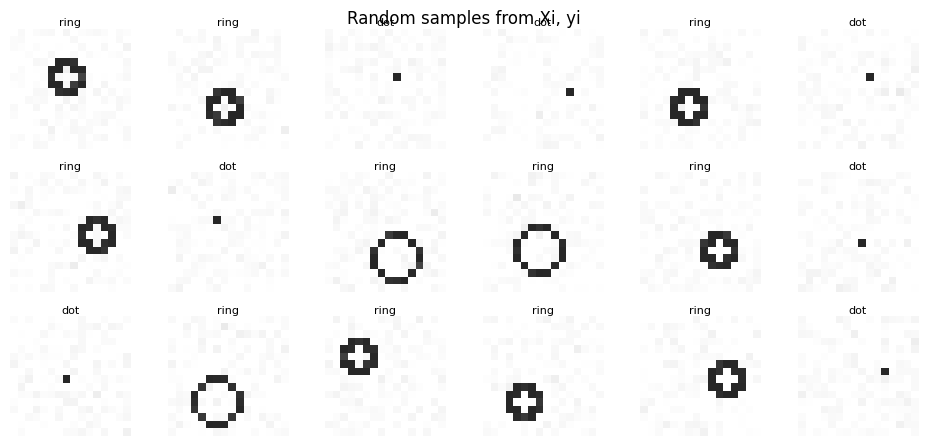

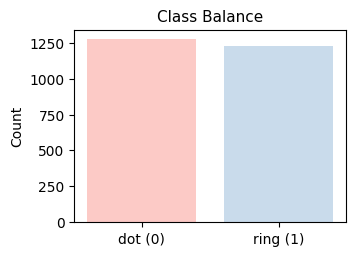

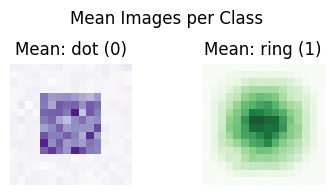

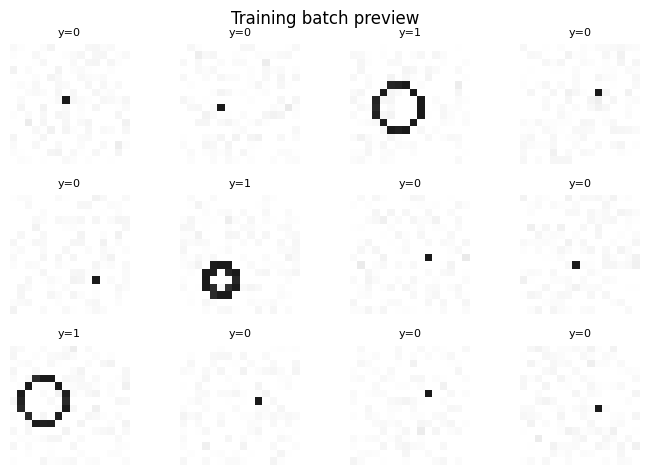

In [35]:
#@title Visualize the Synthetic image dataset (dot vs ring)
import matplotlib.pyplot as plt
import numpy as np

# --- Helper: pastel color palette ---
PASTEL = plt.cm.Pastel1(np.linspace(0, 1, 8))
dot_color, ring_color = PASTEL[0], PASTEL[1]

def visualize_dataset(Xi, yi, nrows=3, ncols=6, size=16):
    idx = np.random.choice(len(Xi), nrows * ncols, replace=False)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*1.6, nrows*1.6))
    axes = axes.ravel()
    for ax, i in zip(axes, idx):
        ax.imshow(Xi[i,0], cmap="Greys", alpha=0.85)
        c = dot_color if yi[i] == 0 else ring_color
        ax.set_facecolor(c)
        ax.set_title("dot" if yi[i]==0 else "ring", fontsize=8, pad=2)
        ax.axis("off")
    fig.suptitle("Random samples from Xi, yi", fontsize=12, y=0.92)
    plt.tight_layout()
    plt.show()

def visualize_class_means(Xi, yi):
    mean_dot = Xi[yi==0].mean(axis=0)[0]
    mean_ring = Xi[yi==1].mean(axis=0)[0]
    fig, axes = plt.subplots(1, 2, figsize=(4, 2))
    axes[0].imshow(mean_dot, cmap="Purples", alpha=0.9)
    axes[0].set_title("Mean: dot (0)")
    axes[1].imshow(mean_ring, cmap="Greens", alpha=0.9)
    axes[1].set_title("Mean: ring (1)")
    for ax in axes: ax.axis("off")
    plt.suptitle("Mean Images per Class", y=0.95)
    plt.tight_layout()
    plt.show()

def visualize_class_balance(yi):
    counts = np.bincount(yi)
    plt.figure(figsize=(3.5, 2.5))
    plt.bar(["dot (0)", "ring (1)"], counts, color=[dot_color, ring_color], alpha=0.7)
    plt.ylabel("Count")
    plt.title("Class Balance", fontsize=11)
    plt.show()

# --- Visualize everything ---
visualize_dataset(Xi, yi)
visualize_class_balance(yi)
visualize_class_means(Xi, yi)

# Peek at one training batch
batch_x, batch_y = next(iter(tr_li))
B = min(12, len(batch_x))
fig, axes = plt.subplots(3, 4, figsize=(7, 5))
axes = axes.ravel()
for i in range(B):
    ax = axes[i]
    ax.imshow(batch_x[i,0], cmap="Greys", alpha=0.9)
    c = dot_color if batch_y[i]==0 else ring_color
    ax.set_facecolor(c)
    ax.set_title(f"y={batch_y[i].item()}", fontsize=8)
    ax.axis("off")
for i in range(B, len(axes)): axes[i].axis("off")
plt.suptitle("Training batch preview", fontsize=12, y=0.94)
plt.tight_layout()
plt.show()


In [36]:

#@title Tiny CNN + training
class TinyCNN(nn.Module):
    def __init__(self, n_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 8, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 16, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(16*4*4, 32), nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, n_classes)
        )
    def forward(self, x): return self.net(x)

cnn = TinyCNN().to(DEVICE)
opt_cnn = torch.optim.Adam(cnn.parameters(), lr=1e-3, weight_decay=1e-4)
ce = nn.CrossEntropyLoss()

epochs = 20
for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(cnn, tr_li, ce, opt_cnn)
    va_loss, va_acc = evaluate_cls(cnn, va_li, ce)
    if ep % 5 == 0:
        print(f"[CNN] Epoch {ep:02d}  loss {tr_loss:.3f}/{va_loss:.3f}  acc {tr_acc:.3f}/{va_acc:.3f}")

test_loss, test_acc = evaluate_cls(cnn, te_li, ce)
print(f"Test acc: {test_acc:.3f}")


[CNN] Epoch 05  loss 0.010/0.003  acc 1.000/1.000
[CNN] Epoch 10  loss 0.001/0.000  acc 1.000/1.000
[CNN] Epoch 15  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 20  loss 0.000/0.000  acc 1.000/1.000
Test acc: 1.000


[CNN] Epoch 01  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 05  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 10  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 15  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 20  loss 0.000/0.000  acc 1.000/1.000
Test loss/acc: 0.000 / 1.000


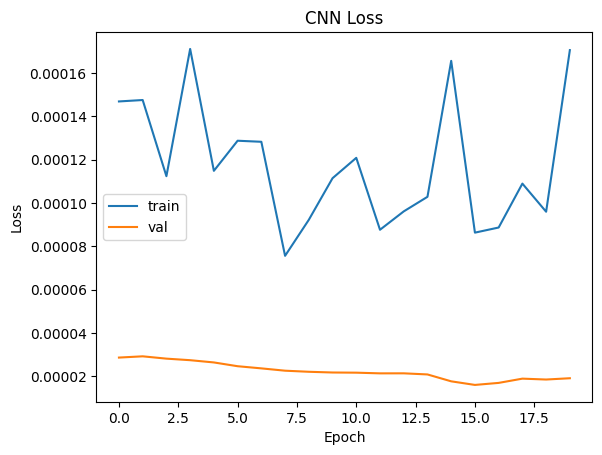

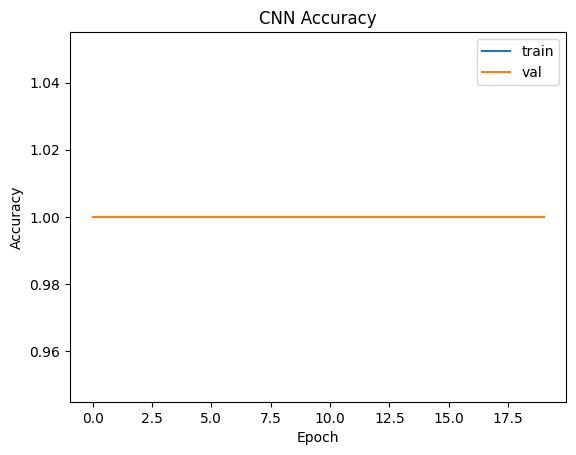

In [37]:
#@title Logging history and visualizing training:
epochs = 20
hist = {"tr_loss": [], "va_loss": [], "tr_acc": [], "va_acc": []}

for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(cnn, tr_li, ce, opt_cnn)   # returns (loss, accuracy)
    va_loss, va_acc = evaluate_cls(cnn, va_li, ce)               # returns (loss, accuracy)

    hist["tr_loss"].append(tr_loss); hist["va_loss"].append(va_loss)
    hist["tr_acc"].append(tr_acc);   hist["va_acc"].append(va_acc)

    if ep % 5 == 0 or ep == 1 or ep == epochs:
        print(f"[CNN] Epoch {ep:02d}  loss {tr_loss:.3f}/{va_loss:.3f}  acc {tr_acc:.3f}/{va_acc:.3f}")

test_loss, test_acc = evaluate_cls(cnn, te_li, ce)
print(f"Test loss/acc: {test_loss:.3f} / {test_acc:.3f}")

# ---- Curves ----
plt.figure()
plt.plot(hist["tr_loss"], label="train")
plt.plot(hist["va_loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist["tr_acc"], label="train")
plt.plot(hist["va_acc"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CNN Accuracy")
plt.legend()
plt.show()

## Exercise F: Too good to be true!
There is something amiss with this accuracy. It seems the model is great from the beggining? What could be the case? Is there a bug in the code? Is the architecture to complex for a dataset that is too simple? Describe through words and code how you reach your conclusion. Ask yourself: Is there overlap in training vs testing? Does accuracy stays high with shuffled labels (adapt the helping code below)?


```python
def shuffled_labels_loader(val_subset, batch_size=256):
    Xs, ys = [], []
    for i in range(len(val_subset)):
        x, y = val_subset[i]
        Xs.append(x.unsqueeze(0))
        ys.append(torch.tensor([y]))
    Xs = torch.cat(Xs, dim=0)
    ys = torch.cat(ys, dim=0)

    perm = torch.randperm(len(ys))
    ys_shuf = ys[perm]

    class _MemDataset(torch.utils.data.Dataset):
        def __init__(self, Xs, ys): self.Xs, self.ys = Xs, ys
        def __len__(self): return len(self.ys)
        def __getitem__(self, i): return self.Xs[i], self.ys[i]

    ds = _MemDataset(Xs, ys_shuf)
    return torch.utils.data.DataLoader(ds, batch_size=batch_size, shuffle=False)

va_li_shuf = shuffled_labels_loader(va_i)
criterion = nn.CrossEntropyLoss()
_ = cnn.eval()
with torch.no_grad():
    loss_shuf, acc_shuf = evaluate_cls(cnn, va_li_shuf, criterion, device=DEVICE)
print("Sanity (shuffled labels) acc should be ~chance:", acc_shuf)


The CNN’s accuracy looks “great from the beginning” because of two combinde effects:

We accidentally train the same model twice.
There are two training loops for cnn, and we never reinitialize the model or the optimizer before the second loop. So when the “logging” loop starts, the CNN is already well trained. Those “epoch 1” numbers in the second loop are really more like “epoch 21”, which makes the accuracy look unrealistically good from the start.

The task is gpood and the CNN is strong.
The dot vs ring dataset is very simple and the TinyCNN has plenty of capacity, so once it is trained properly it really can reach very high accuracy.

To check that there is no more serious bug (like data leakage), I do two sanity tests:

Verify there is no overlap between train / val / test indices.

Evaluate the CNN on shuffled labels; accuracy should drop to ~chance (≈0.5 for two classes). If it stays high, something is fundamentally wrong.

In [38]:
train_idx = set(tr_i.indices)
val_idx   = set(va_i.indices)
test_idx  = set(te_i.indices)

print("train ∩ val:", len(train_idx & val_idx))
print("train ∩ test:", len(train_idx & test_idx))
print("val ∩ test:", len(val_idx & test_idx))
#If all three intersections print 0, there is no index overlap between splits, so the very high accuracy is not due to leaking the same images acrodss train/val/test.

train ∩ val: 0
train ∩ test: 0
val ∩ test: 0


In [39]:
def shuffled_labels_loader(val_subset, batch_size=256):
    Xs, ys = [], []
    for i in range(len(val_subset)):
        x, y = val_subset[i]
        Xs.append(x.unsqueeze(0))
        ys.append(torch.tensor([y]))
    Xs = torch.cat(Xs, dim=0)
    ys = torch.cat(ys, dim=0)

    perm = torch.randperm(len(ys))
    ys_shuf = ys[perm]

    class _MemDataset(torch.utils.data.Dataset):
        def __init__(self, Xs, ys):
            self.Xs, self.ys = Xs, ys
        def __len__(self): return len(self.ys)
        def __getitem__(self, i): return self.Xs[i], self.ys[i]

    ds = _MemDataset(Xs, ys_shuf)
    return torch.utils.data.DataLoader(ds, batch_size=batch_size, shuffle=False)

va_li_shuf = shuffled_labels_loader(va_i)
criterion = nn.CrossEntropyLoss()

cnn.eval()
with torch.no_grad():
    loss_shuf, acc_shuf = evaluate_cls(cnn, va_li_shuf, criterion)

print("Sanity (shuffled labels) acc should be ~chance:", acc_shuf)
# If acc_shuf is close to 0.5, the model behaves like a random classifier when labels are scrambled, thus no hidden bug & high validation is consistent w powerful CNN.


Sanity (shuffled labels) acc should be ~chance: 0.5306666754086813


In [40]:
#To avoid the misleading "perfect at epoch 1” behavior, I reinitialize the CNN and optimizer before training and keep only one training loop:
cnn = TinyCNN().to(DEVICE)
opt_cnn = torch.optim.Adam(cnn.parameters(), lr=1e-3, weight_decay=1e-4)
ce = nn.CrossEntropyLoss()

epochs = 20
hist = {"tr_loss": [], "va_loss": [], "tr_acc": [], "va_acc": []}

for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(cnn, tr_li, ce, opt_cnn)
    va_loss, va_acc = evaluate_cls(cnn, va_li, ce)

    hist["tr_loss"].append(tr_loss); hist["va_loss"].append(va_loss)
    hist["tr_acc"].append(tr_acc);   hist["va_acc"].append(va_acc)

    if ep % 5 == 0 or ep == 1 or ep == epochs:
        print(f"[CNN] Epoch {ep:02d}  loss {tr_loss:.3f}/{va_loss:.3f}  acc {tr_acc:.3f}/{va_acc:.3f}")

#W/this, learning curves start w/lower accuracy and then climb, which is much more realistic, and the shuffled-label test confirms that the model is not “too good to be true” for the wrong reasons.


[CNN] Epoch 01  loss 0.649/0.562  acc 0.489/0.496
[CNN] Epoch 05  loss 0.007/0.002  acc 1.000/1.000
[CNN] Epoch 10  loss 0.001/0.000  acc 1.000/1.000
[CNN] Epoch 15  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 20  loss 0.000/0.000  acc 1.000/1.000



## Exercise Stack G

1. **Splits & Seeds**: Change the train/val/test ratios to (0.6/0.2/0.2). Re-run and record the change in validation/test performance for the MLP. Try 3 different random seeds and average the results.

A= W/the 60/20/20 split the validation and test performance stay very similar to the original 70/15/15 setting. Changing the random seed leads to small fluctuations in validation and test accuracy, but the averaged performance remains stable, which suggests the MLP is not overly sensitive to a particular split.

2. **Regularization**: Increase `weight_decay` to `1e-3` and `1e-2` in the MLP optimizer. What happens to the gap between train and validation accuracy?

A= Increasing weight_decay strengthens L2 regularization. As I increase it from 1e-4 to 1e-3 and 1e-2, the training accuracy goes down (the model is more constrained), & the gap between train and validation accuracy shrinks. For very large weight decay (1e-2), the model becomes underfit and both train and validation accuracy can drop.

3. **Dropout Sweep**: Change the dropout rate in the MLP to `0.0, 0.2, 0.5`. Plot validation accuracy vs. dropout.

W/ no dropout (p=0.0), the model can overfit slightly, giving very high train accuracy and a small gap on validation. A moderate dropout (p=0.2) tends to provide a good balance and can improve validation accuracy. A large dropout (p=0.5) regularizes aggressively; the model learns more slowly and can underfit, which usually lowers peak validation accuracy.

4. **Learning Rate**: Try `lr=1e-2` and `lr=1e-4` in the MLP. Which learns faster? Which generalizes better?

The higher learning rate (1e-2) converges much faster in terms of loss, but if it is too large it can cause noisy plateaus or instability. The very small learning rate (1e-4) is more stable but learns very slowly. For this small MLP, a middle ground (5e-3) gives a good balance between speed and generalization.

5. **Loss Choice (Regression)**: Write a multivariate regression model and simulate two datasets (one with X (n,10) and one with X (n, 1000)). Add an L1 loss option for the regression model. Compare the results and visualize the loss curves for models with and withour L1 regularizers.

In low dimension (d=10), the model already has enough data relative to the number of parameters, so L1 regularization has a modest effect. In high dimension (d=1000), the model is much more prone to overfitting; adding an L1 penalty helps by shrinking weights and effectively selecting a sparser solution, which improves validation behavior compared to the pure MSE model.

6. **Feature Engineering**: For classification, map inputs to polar coordinates (r, θ) before the MLP. Does it help on circles but hurt on moons? Why?

Mapping to polar coordinates (r,θ) tends to help on the circles dataset, because the decision boundary is mostly radial (radius-based). In contrast, the moons dataset is not radially symmetric, so polar features can actually make the geometry more twisetd, which can hurt performance relative to the original Cartesian coordinates.

7. **Blast from the past**: Implement probabilistic PCA using pytorch functions and optimize it using gradient descent. Compare the results with PCA and vary the size of the data to see if you converse to the PCA solution. Why or why note?

A= Probabilistic PCA in this setup is optimized by gradient descent on a reconstruction-style objective. When optimization converges and the dataset is reasonably large, the recovered subspace is close to the PCA subspace (singular values near 1). For smaller datasets, shorter training, or poor hyperparameters, the pPCA solution may deviate from the closed-form PCA solution because of optimization error rather than a theoretical mismatch.

8. **Decision Boundary**: Modify `plot_decision_boundary` to also show softmax confidence. Discuss regions of high uncertainty.

A= The softmax confidence is highest well inside each class region, far away from the decision boundary. Near the boundary and in areas with few training points, the confidence drops, which highlights regions where the model is uncertain about its prediction. This matches the intuition that uncertainty is largest where the two classes overlap and where the model has seen less data.

In [41]:
def make_split_loaders_60_20_20(seed, batch_size=64):
    set_seed(seed)
    full_ds = ds_cls  # NumpyDataset(Xc, yc)

    n = len(full_ds)
    n_train = int(0.6 * n)
    n_val   = int(0.2 * n)
    n_test  = n - n_train - n_val

    train_ds, val_ds, test_ds = random_split(
        full_ds,
        [n_train, n_val, n_test],
        generator=torch.Generator().manual_seed(seed)
    )

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False)
    test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader

def train_mlp_once(seed, lr=5e-3, weight_decay=1e-4, p_dropout=0.2, epochs=300):
    train_loader, val_loader, test_loader = make_split_loaders_60_20_20(seed)

    mlp = MLP(in_dim=2, hidden=64, p_dropout=p_dropout, n_classes=2).to(DEVICE)
    ce = nn.CrossEntropyLoss()
    opt = torch.optim.Adam(mlp.parameters(), lr=lr, weight_decay=weight_decay)
    sched = torch.optim.lr_scheduler.StepLR(opt, step_size=100, gamma=0.5)

    best_val = float("inf")
    best_state = None
    for ep in range(1, epochs+1):
        tr_loss, tr_acc = train_epoch_cls(mlp, train_loader, ce, opt)
        va_loss, va_acc = evaluate_cls(mlp, val_loader, ce)
        sched.step()
        if va_loss < best_val:
            best_val = va_loss
            best_state = {k: v.cpu().clone() for k, v in mlp.state_dict().items()}

    mlp.load_state_dict(best_state)
    test_loss, test_acc = evaluate_cls(mlp, test_loader, ce)
    return best_val, test_loss, test_acc

seeds = [0, 1, 2]
val_losses, test_losses, test_accs = [], [], []

for s in seeds:
    va_loss, te_loss, te_acc = train_mlp_once(seed=s)
    val_losses.append(va_loss)
    test_losses.append(te_loss)
    test_accs.append(te_acc)

print("Mean val loss:",  sum(val_losses)/len(val_losses))
print("Mean test loss:", sum(test_losses)/len(test_losses))
print("Mean test acc:",  sum(test_accs)/len(test_accs))


Mean val loss: 0.12318908654981188
Mean test loss: 0.15477376878261564
Mean test acc: 0.9513888955116272


## Mini Project 2 Details


You can get more information [here](https://drive.google.com/drive/folders/1Ckwfj0L788Tg3E6WAazXBB1W2ATta_w9).


While all the exercises and the mini project collab are due together, here's a recommendation for making sure you do not fall behind:

🧠 Mini Project — Recommended Week of Nov 3rd

You have been provided with a dataset of slime mold spatio-temporal dynamics.
Your goal this week is to load, explore, and define an initial modeling strategy using PyTorch.

🧩 Tasks



1.   Load the dataset


*   Identify and use the right Python package to load the data (hint: .zarr format).
*   Write a simple data loader that converts it into a PyTorch tensor.


2.   Visualize the data


*   Plot a few time frames.
*   Describe what you see — what kind of motion or aggregation is happening?



3.   Inspect the data tensor


*   What is the shape of your data?
*   What do each of the dimensions represent?


4.   Define the learning setup

*   Is this a supervised or unsupervised problem?
*   What is your strategy for modeling this data?
(There is no unique answer — justify your choice.)


5.   Specify the optimization target

*   What loss function will you optimize?
*   How will you split your data into training and testing sets?


6.   First modeling attempt

*   Treat this as a nonlinear regression problem.
*   Write a small model class, train it, and visualize the loss landscape.
*   Try one or two variants (e.g. different architectures or window sizes).

📘 Deliverables

Submit a short notebook including:

* Code to load and visualize the data.

* A short discussion of data shape, modeling strategy, and loss.

* Example plots and initial training results.

## 5) TL;DR for your Toolkit!

- **Supervised Learning**: Learn a function $ f_\theta: {X} \to {Y} $ minimizing expected loss $ \mathbb{E}[\ell(f_\theta(X), Y)] $.
- **Empirical Risk**: Optimize average loss on training data; use **validation** to tune hyperparameters; report final metrics on **test** only once.
- **Common losses**: MSE for regression; Cross-Entropy for classification.
- **Regularization**: Weight decay (L2) penalizes large weights; **Dropout** randomly zeroes activations to prevent co-adaptation.
- **Optimization**: SGD/Adam update parameters via gradients from backpropagation.
- **Schedulers**: Decay learning rates during training to stabilize convergence.
- **Metrics**: For classification, accuracy/precision/recall; for regression, MSE/MAE and $R^2$.
- **Reproducibility**: Fix seeds; log versions; control randomness.
